In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dechorate import constants

# Load RIRs

In [2]:
path_to_rirs = os.path.join('..', 'data', 'final', 'rir_matrix.npy')
rirs = np.load(path_to_rirs)

print('RIRs matrix dimension')
print(rirs.shape)

RIRs matrix dimension
(384000, 30, 7, 11)


In [4]:
path_to_delay_note = os.path.join('..', 'data', 'final', 'database_delay.csv')
delay_df = pd.read_csv(path_to_delay_note)
print(delay_df)

      Unnamed: 0 signal              wavefile               path_hdf5  mic_id  \
0              0    rir  2020-01-23__20-24-07         /000000/rir/1/1     1.0   
1              1    rir  2020-01-23__20-24-07         /000000/rir/1/2     2.0   
2              2    rir  2020-01-23__20-24-07         /000000/rir/1/3     3.0   
3              3    rir  2020-01-23__20-24-07         /000000/rir/1/4     4.0   
4              4    rir  2020-01-23__20-24-07         /000000/rir/1/5     5.0   
...          ...    ...                   ...                     ...     ...   
2382        2382    rir  2020-01-29__18-05-22        /020002/rir/7/27    27.0   
2383        2383    rir  2020-01-29__18-05-22        /020002/rir/7/28    28.0   
2384        2384    rir  2020-01-29__18-05-22        /020002/rir/7/29    29.0   
2385        2385    rir  2020-01-29__18-05-22        /020002/rir/7/30    30.0   
2386        2386    rir  2020-01-29__18-05-22  /020002/rir/7/loopback    31.0   

      src_id  room_code   d

# Visualize RIRs

In [8]:
L, I, J, D = rirs.shape
datasets = constants['datasets']

0 0 0 4444


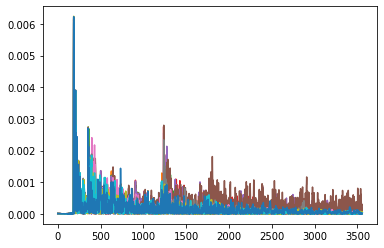

1 0 0 4444


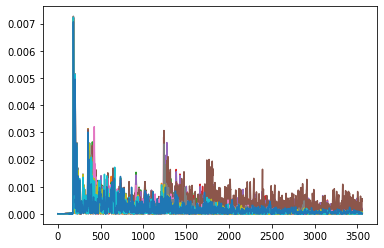

2 0 0 4444


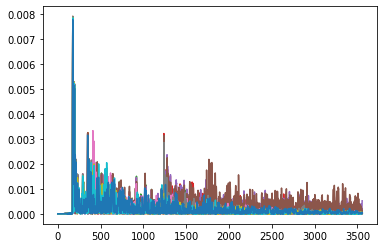

3 0 0 4444


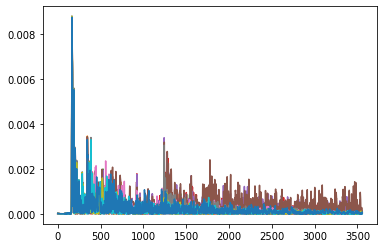

4 0 0 4444


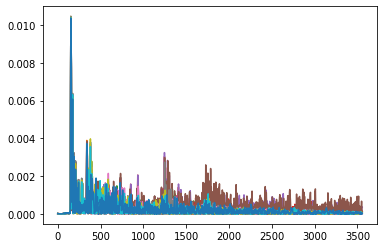

5 0 0 4444


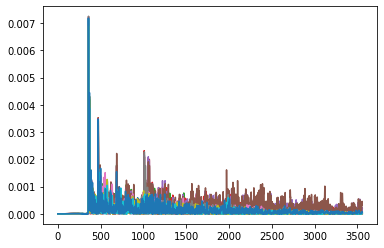

6 0 0 4444


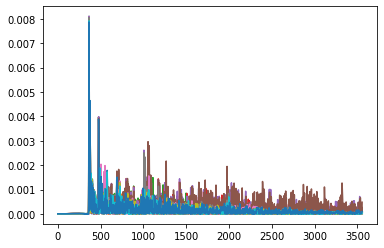

7 0 0 4444


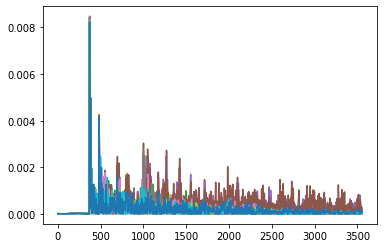

8 0 0 4444


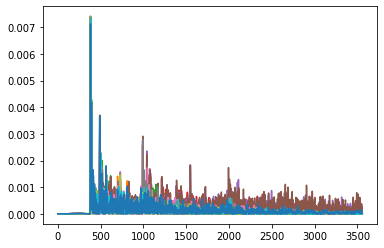

9 0 0 4444


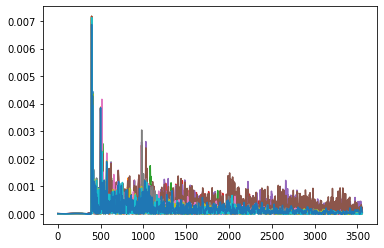

10 0 0 4444


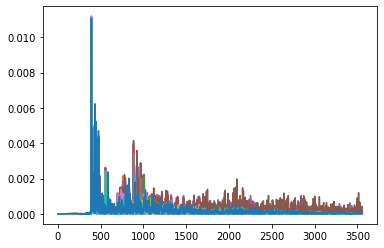

11 0 0 4444


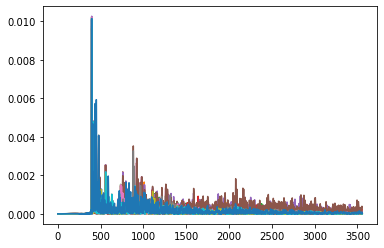

12 0 0 4444


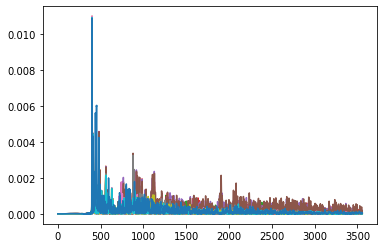

13 0 0 4444


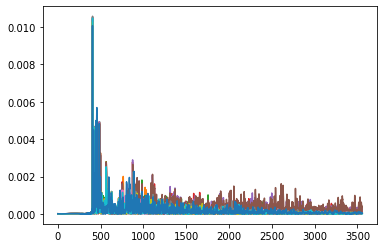

14 0 0 4444


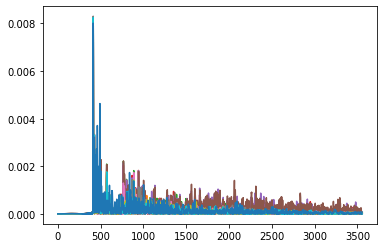

15 0 0 4444


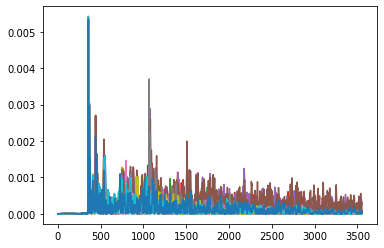

16 0 0 4444


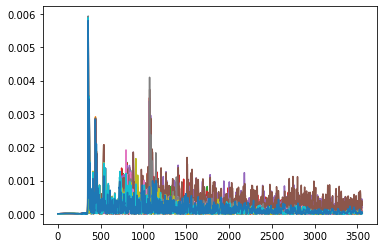

17 0 0 4444


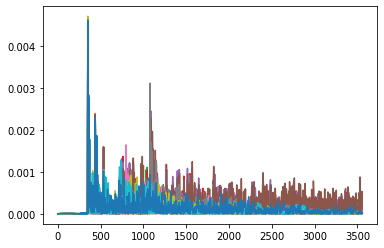

18 0 0 4444


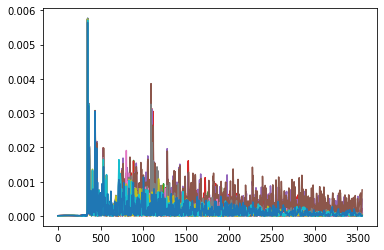

19 0 0 4444


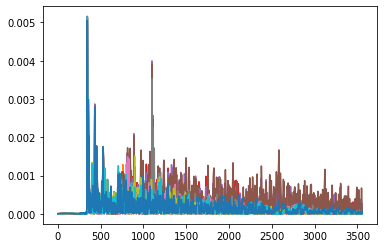

20 0 0 4444


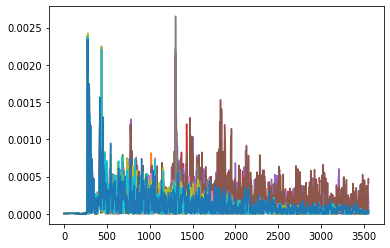

21 0 0 4444


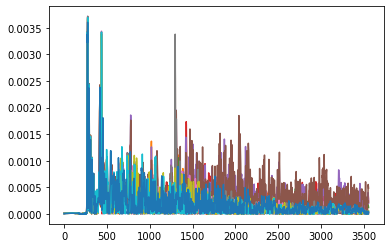

22 0 0 4444


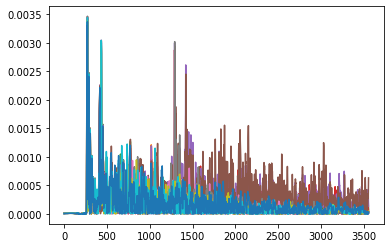

23 0 0 4444


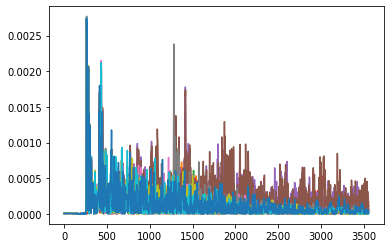

24 0 0 4444


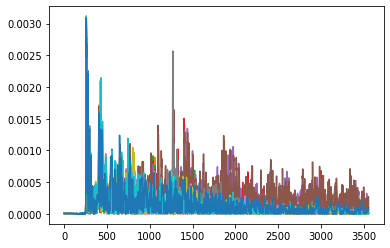

25 0 0 4444


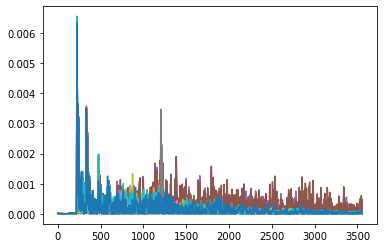

26 0 0 4444


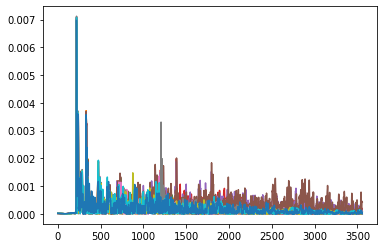

27 0 0 4444


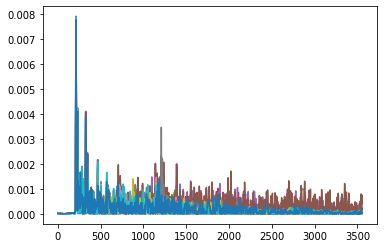

28 0 0 4444


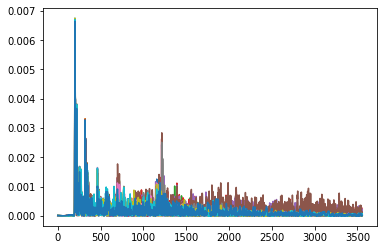

29 0 0 4444


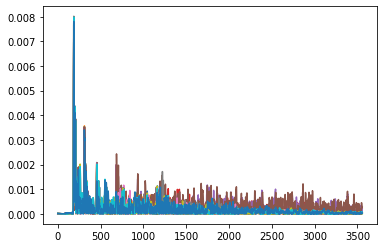

In [24]:
j = 0
max_len = 8000

for i in range(I):
    delays = delay_df.loc[
        (delay_df['mic_id'] == i+1) & 
        (delay_df['src_id'] == j+1)
        ]['delay'].values
    delay = int(np.median(delays))
    print(i, j, d, delay)
    curr_rirs = rirs[delay:max_len, i, j, :]
    plt.plot(np.abs(curr_rirs))
    plt.show()

In [ ]:
plt.imshow(np.abs(curr_rirs).T, aspect='auto')